In [1]:
import numpy as np
import uproot as ur
import awkward as ak
import sys
sys.path.append('/home/mjovanovic/Work/LCStudies')
from data import particle_data_visualize_plot_utils as pu
import matplotlib.pyplot as plt


Functions

In [2]:
def flatten_event_to_cells(event):
    return np.array([cell for clus in event for cell in clus])

def flatten_events_and_clus_to_events(events_data):
    return [[cell_data for clus_data in event_data for cell_data in clus_data] for event_data in events_data]

def flatten_events_to_clus(events_data):
    return [clus_data for event_data in events_data for clus_data in event_data]

def flatten_one_layer(data):
    return [data_layer2 for data_layer1 in data for data_layer2 in data_layer1]

def flatten_layers(data, num_layers=1):
    for i in range(num_layers):
        data = flatten_one_layer(data)
    return data

def flatten_events_to_cells(events_data):
    return [cell_data for clus_data in flatten_events_to_clus(events_data) for cell_data in clus_data]

def DeltaR(etas1, phis1, etas2, phis2):
    return np.sqrt((etas1-etas2)**2 + (phis1-phis2)**2)

Load event tree

In [3]:
rho_root_data = ur.open("~/start_tf/rho_full_500.root")

events = events = rho_root_data["EventTree"]
events_arr = events.arrays(library="ak")
events_arr_np = events.arrays(library="np")

In [4]:
event_idx = 1
clus_idx = 0
cell_idx = 0

print("particles:", events_arr["truthPartPdgId"][event_idx])
print("particles Pt:", events_arr["truthPartPt"][event_idx])
print("particles Eta:", events_arr["truthPartEta"][event_idx])
print("particles Phi:", events_arr["truthPartPhi"][event_idx])

print(events.keys())
print("events:", events_arr["eventNumber"])
print(events_arr["cluster_cell_hitsTruthE"])
print("num events:", len(events_arr["cluster_cell_hitsTruthE"]))
print("num clus in event:", len(events_arr["cluster_cell_hitsTruthE"][event_idx]))
print("num cells in clus:", len(events_arr["cluster_cell_hitsTruthE"][event_idx][clus_idx]))
print("cluster_nCells:", events_arr["cluster_nCells"][event_idx][clus_idx])
print("particles with leading deposits (max 3) energy deposited:", events_arr["cluster_cell_hitsTruthE"][event_idx][cell_idx][cell_idx])
print()

print(events_arr["cluster_cell_hitsTruthIndex"])
print("num events:", len(events_arr["cluster_cell_hitsTruthIndex"]))
print("num clus:", len(events_arr["cluster_cell_hitsTruthIndex"][event_idx]))
print("num cells in clus:", len(events_arr["cluster_cell_hitsTruthIndex"][event_idx][clus_idx]))
print("clus particle depositers:", events_arr["cluster_cell_hitsTruthIndex"][event_idx])
print("each cells particle depositers:", events_arr["cluster_cell_hitsTruthIndex"][event_idx][cell_idx])
print("particle idx of leading depositers:", events_arr["cluster_cell_hitsTruthIndex"][event_idx][cell_idx][cell_idx])


particles: [-213, -211, 111, 22, 22]
particles Pt: [5.02, 1.57, 3.81, 2.02, 1.79]
particles Eta: [-1.72, -1.84, -1.57, -1.6, -1.53]
particles Phi: [-1.78, -1.2, -2.01, -2.03, -2]
['runNumber', 'eventNumber', 'lumiBlock', 'coreFlags', 'mcEventNumber', 'mcChannelNumber', 'mcEventWeight', 'nTruthPart', 'G4PreCalo_n_EM', 'G4PreCalo_E_EM', 'G4PreCalo_n_Had', 'G4PreCalo_E_Had', 'truthVertexX', 'truthVertexY', 'truthVertexZ', 'truthPartPdgId', 'truthPartStatus', 'truthPartBarcode', 'truthPartPt', 'truthPartE', 'truthPartMass', 'truthPartEta', 'truthPartPhi', 'nTrack', 'trackPt', 'trackP', 'trackMass', 'trackEta', 'trackPhi', 'trackTruthParticleIndex', 'trackVisibleCalHitCaloEnergy', 'trackFullCalHitCaloEnergy', 'trackSubtractedCaloEnergy', 'trackNumberOfPixelHits', 'trackNumberOfSCTHits', 'trackNumberOfPixelDeadSensors', 'trackNumberOfSCTDeadSensors', 'trackNumberOfPixelSharedHits', 'trackNumberOfSCTSharedHits', 'trackNumberOfPixelHoles', 'trackNumberOfSCTHoles', 'trackNumberOfInnermostPixelL

NEGATIVE ENERGIES DEBUG

In [5]:
# check if sum of cells energy is less than 0
cells_energy_deposits = np.array(flatten_layers(events_arr_np["cluster_cell_hitsTruthE"], 2))
cells_with_sum_energy_less_0 = np.array([np.sum(cells_energy_deposits) for cells_energy_deposits in flatten_layers(events_arr_np["cluster_cell_hitsTruthE"], 2)]) < 0

print("frac cells with sum of energy deposits < 0:", np.count_nonzero(cells_with_sum_energy_less_0)/len(cells_with_sum_energy_less_0))
print(cells_energy_deposits[cells_with_sum_energy_less_0])


/tmp/ipykernel_38096/632342286.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  cells_energy_deposits = np.array(flatten_layers(events_arr_np["cluster_cell_hitsTruthE"], 2))


frac cells with sum of energy deposits < 0: 0.0001638055300746953
[<STLVector [-2.8398438] at 0x7f5115d09700>
 <STLVector [-2.8398438] at 0x7f5115d166a0>
 <STLVector [-3.387085, 1.2609863] at 0x7f5115c42ca0>
 <STLVector [-2.8256607] at 0x7f51159659d0>
 <STLVector [-5.8410797] at 0x7f511582d250>
 <STLVector [-0.17565918] at 0x7f51155f4e50>
 <STLVector [-1.2895508] at 0x7f51154b9190>
 <STLVector [-3.3666115] at 0x7f5115311dc0>
 <STLVector [-2.0825958, 0.03717041] at 0x7f511518eca0>
 <STLVector [-2.0825958, 0.03717041] at 0x7f511519b5e0>
 <STLVector [-3.5723877, 0.5673828] at 0x7f5114f05ca0>
 <STLVector [-0.6455078] at 0x7f5114eba250>
 <STLVector [-5.5585938] at 0x7f5114ccf730>
 <STLVector [-4.1308594, 1.6757812] at 0x7f5114ce5910>
 <STLVector [-4.8687744, 1.1621094] at 0x7f5114c8a250>]


In [6]:
pu.plot_hist([flatten_layers(events_arr_np["cluster_cell_hitsTruthIndex"], 3)], 100, "Truth idx", "Truth idx", "Frequency")
pu.plot_hist([flatten_layers(events_arr_np["cluster_cell_hitsTruthE"], 3)], 100, "Energy", "Energy", "Frequency")

print("min particle energy deposit:", ak.min(flatten_layers(events_arr_np["cluster_cell_hitsTruthE"], 3)))
print("max particle energy deposit", ak.max(flatten_layers(events_arr_np["cluster_cell_hitsTruthE"], 3)))

cells_energy_deposits = flatten_layers(events_arr_np["cluster_cell_hitsTruthE"], 2)
cells_with_sum_energy_less_0 = np.array([np.sum(cells_energy_deposits) for cells_energy_deposits in flatten_layers(events_arr_np["cluster_cell_hitsTruthE"], 2)]) < 0

print("frac cells with sum of energy deposits < 0:", np.count_nonzero(cells_with_sum_energy_less_0)/len(cells_with_sum_energy_less_0))


print("frac cells with energy deposits < 0:", np.count_nonzero(np.array(flatten_layers(events_arr_np["cluster_cell_hitsTruthE"], 3)) < 0)/len(flatten_layers(events_arr_np["cluster_cell_hitsTruthE"], 3)))
print("frac events with energy deposits < 0:", np.count_nonzero([np.count_nonzero([cell_part_dep < 0 for cell_part_dep in flatten_layers(event_part_dep, 2)]) != 0 for event_part_dep in events_arr_np["cluster_cell_hitsTruthE"]]) / len(events_arr_np["cluster_cell_hitsTruthE"]))

TypeError: can only concatenate list (not "int") to list

In [ ]:
# check old datset
rho_root_data = ur.open("/data/atlas/data/allCellTruthv1/pi0/user.mswiatlo.27153451.OutputStream._000001.root")

events = events = rho_root_data["EventTree"]
events_arr = events.arrays(library="ak")
truth_clus_energy_from_calib = flatten_one_layer(events_arr["cluster_ENG_CALIB_TOT"])


In [ ]:
truth_clus_energy_from_calib = flatten_one_layer(events_arr["cluster_ENG_CALIB_TOT"])
sum_clus_energy_from_part_contr = [np.sum(clus_contr, axis=None) for event_contr in events_arr["cluster_cell_hitsTruthE"] for clus_contr in event_contr]

fig = plt.figure()
fig.patch.set_facecolor('white')
plt.plot(sum_clus_energy_from_part_contr, truth_clus_energy_from_calib)

ValueError: key "cluster_cell_hitsTruthE" does not exist (not in record)

(https://github.com/scikit-hep/awkward-1.0/blob/1.8.0/src/libawkward/util.cpp#L525)

Plot general dataset info

Mean number of clusters: 2.506
500


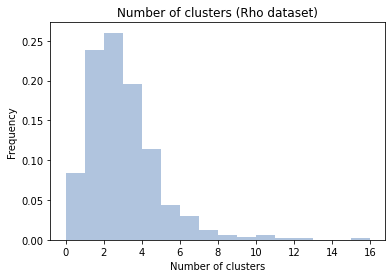

Mean number of tracks: 0.906


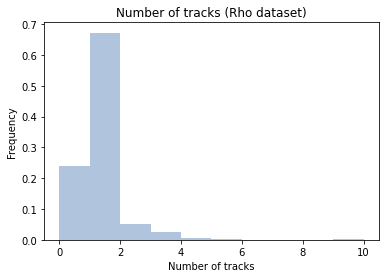

In [ ]:
print("Mean number of clusters:", np.mean(events_arr["nCluster"]))
print(len(events_arr["nCluster"]))
pu.plot_hist(np.array(events_arr["nCluster"]), 16, "Number of clusters (Rho dataset)", "Number of clusters", "Frequency", colour="lightsteelblue")

print("Mean number of tracks:", np.mean(events_arr["nTrack"]))
pu.plot_hist(np.array(events_arr["nTrack"]), 10, "Number of tracks (Rho dataset)", "Number of tracks", "Frequency", colour="lightsteelblue")

Contributing particle analysis

88% of events have 5 particles (rho, charged pion, neutral pion, gamma x2)
12% of events have 6 particles (rho, charged pion, neutral pion, gamma x3)


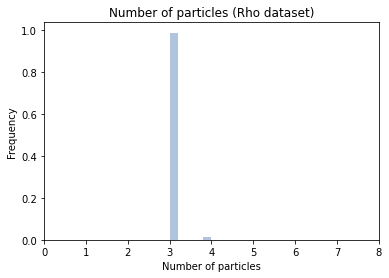

In [ ]:
# number of particles in rho event
num_particles = [len(particle_ids) for particle_ids in events_arr["truthPartPdgId"]]

print("88% of events have 5 particles (rho, charged pion, neutral pion, gamma x2)")
print("12% of events have 6 particles (rho, charged pion, neutral pion, gamma x3)")

pu.plot_hist(num_particles, 5, "Number of particles (Rho dataset)", "Number of particles", "Frequency", colour="lightsteelblue", xlim=(0,8))


~35% of energy contributions are from the charged pion and ~60% are from the 2 gammas split and ~2% from 3rd gamma


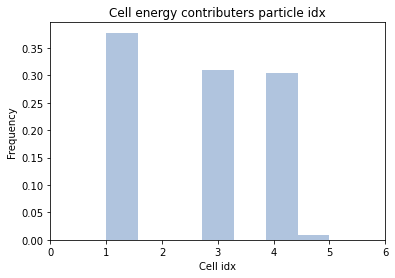

In [ ]:
# Q - what particles are the depoists from??
# idx: 0-rho, 1-pi+/-, 2-pi0, 3-gamma, 4-gamma, 5-gamma
print("~35% of energy contributions are from the charged pion and ~60% are from the 2 gammas split and ~2% from 3rd gamma")
pu.plot_hist(flatten_layers(events_arr["cluster_cell_hitsTruthIndex"], 3), 7, "Cell energy contributers particle idx", "Cell idx", "Frequency", colour="lightsteelblue", xlim=(0, 6)) 

Find $\Delta$ R between charged and neutral pions

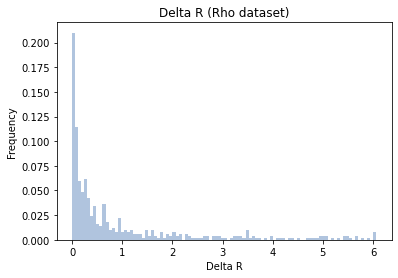

'\npipm_thetas = [2*np.arctan(np.exp(-eta)) for eta in pipm_etas]\npi0_thetas = [2*np.arctan(np.exp(-eta)) for eta in pi0_etas]\n\ndelta_R2 = np.cos(-1)*(np.cos(pipm_thetas)*np.cos(pi0_thetas) + np.sin(pipm_thetas)*np.sin(pi0_thetas)*np.cos(pipm_phis - pi0_phis))\npu.plot_hist(delta_R2, 100, "Delta R2 (Rho dataset)", "Delta R", "Frequency", colour="lightsteelblue")\n'

In [ ]:
pipm_idx = 1
pi0_idx = 2

pipm_etas = np.array(events_arr['truthPartEta'][:, pipm_idx])
pipm_phis = np.array(events_arr['truthPartPhi'][:, pipm_idx])

pi0_etas = np.array(events_arr['truthPartEta'][:, pi0_idx])
pi0_phis = np.array(events_arr['truthPartPhi'][:, pi0_idx])

# angular separation between the vectors in the eta/phi plane - over events
delta_R = np.sqrt((pipm_etas - pi0_etas)**2 + (pipm_phis - pi0_phis)**2)

pu.plot_hist(delta_R, 100, "Delta R (Rho dataset)", "Delta R", "Frequency", colour="lightsteelblue")

"""
pipm_thetas = [2*np.arctan(np.exp(-eta)) for eta in pipm_etas]
pi0_thetas = [2*np.arctan(np.exp(-eta)) for eta in pi0_etas]

delta_R2 = np.cos(-1)*(np.cos(pipm_thetas)*np.cos(pi0_thetas) + np.sin(pipm_thetas)*np.sin(pi0_thetas)*np.cos(pipm_phis - pi0_phis))
pu.plot_hist(delta_R2, 100, "Delta R2 (Rho dataset)", "Delta R", "Frequency", colour="lightsteelblue")
"""

In [ ]:
def plot_hist(data, bins, title, x_label, y_label, normalize=True, colour=None, xlim=None):
    data_min = min(data)
    data_max = max(data)
    
    counts, bins = np.histogram(data, bins, (data_min, data_max + 1))
    # normalize counts
    if normalize:
        counts = counts / np.sum(counts)
    fig = plt.figure()
    fig.patch.set_facecolor('white')
    plt.hist(bins[:-1], bins, weights=counts, color=colour, align="mid")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xlim(xlim)
    plt.show()

/tmp/ipykernel_37939/316216624.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  num_truth_contributions = np.array([[len(cell_truth_con) for clus_truth_con in event_truth_con for cell_truth_con in clus_truth_con]  for event_truth_con in events_arr["cluster_cell_hitsTruthIndex"]])


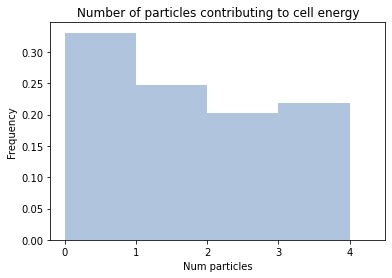

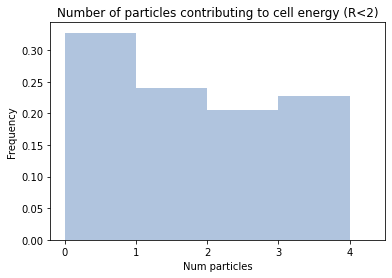

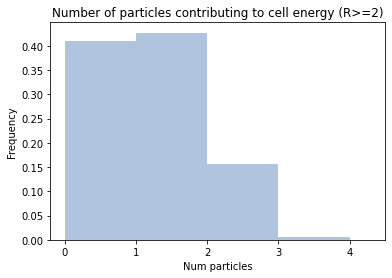

In [ ]:
# number of cells contributing to the energy deposit of each cell
delta_R_cut = 2
num_truth_contributions = np.array([[len(cell_truth_con) for clus_truth_con in event_truth_con for cell_truth_con in clus_truth_con]  for event_truth_con in events_arr["cluster_cell_hitsTruthIndex"]])

plot_hist(flatten_one_layer(num_truth_contributions), 4, "Number of particles contributing to cell energy", "Num particles", "Frequency", xlim=(None, 4.5), colour="lightsteelblue")
plot_hist(flatten_one_layer(num_truth_contributions[delta_R < delta_R_cut]), 4, "Number of particles contributing to cell energy (R<" + str(delta_R_cut) +")", "Num particles", "Frequency", xlim=(None, 4.5), colour="lightsteelblue")
plot_hist(flatten_one_layer(num_truth_contributions[delta_R >= delta_R_cut]), 4, "Number of particles contributing to cell energy (R>=" + str(delta_R_cut) +")", "Num particles", "Frequency", xlim=(None, 4.5), colour="lightsteelblue")


In [ ]:
# plot leading cell contribution fraction
lead_contribution_frac = np.array([[np.max((cells_energy_contr)/np.sum(cells_energy_contr) if len(cells_energy_contr) else 0) for clus_energy_contr in event_energy_contr for cells_energy_contr in clus_energy_contr] for event_energy_contr in events_arr["cluster_cell_hitsTruthE"]])
cell_with_neg_deposit = np.array([[np.min(cells_energy_contr) < 0 if len(cells_energy_contr) else 0) for clus_energy_contr in event_energy_contr for cells_energy_contr in clus_energy_contr] for event_energy_contr in events_arr["cluster_cell_hitsTruthE"]])

/tmp/ipykernel_37939/999412612.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  lead_contribution_frac = np.array([[np.max((cells_energy_contr)/np.sum(cells_energy_contr) if len(cells_energy_contr) else 0) for clus_energy_contr in event_energy_contr for cells_energy_contr in clus_energy_contr] for event_energy_contr in events_arr["cluster_cell_hitsTruthE"]])


min energy deposited by one particle: -8.6904296875
max energy deposited by one particle: 385487.5


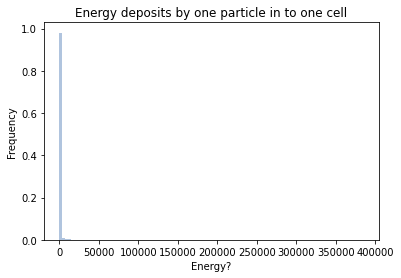

frac of energy deposits > 2000: 0.03422075430782832


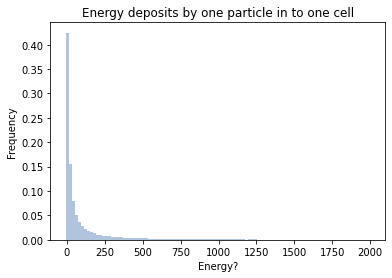

frac of energy deposits < 0: 0.0002585531034712839


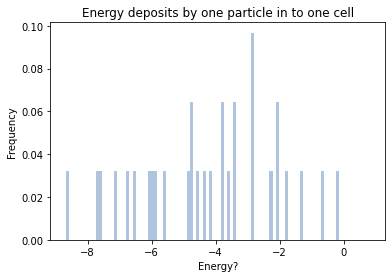

109693
[ 3.93936157e-01  4.16503906e-01  6.00678711e+01  1.26171875e+00
  5.09267578e+01  3.93481445e+01  1.82128906e-01  4.02343750e+01
  4.17822266e+01  9.71923828e-01  1.09667969e+00  2.95744629e+01
  2.40816650e+02 -8.69042969e+00  2.20468750e+01  1.69372559e-01]


In [ ]:
print("min energy deposited by one particle:", np.min(events_arr["cluster_cell_hitsTruthE"], axis=None))
print("max energy deposited by one particle:", np.max(events_arr["cluster_cell_hitsTruthE"], axis=None))
single_particle_in_cell_energies = np.array(flatten_layers(events_arr["cluster_cell_hitsTruthE"], 3))

plot_hist(single_particle_in_cell_energies, 100, "Energy deposits by one particle in to one cell", "Energy?", "Frequency", colour="lightsteelblue")
print("frac of energy deposits > 2000:", len(single_particle_in_cell_energies[single_particle_in_cell_energies > 2000])/len(single_particle_in_cell_energies))
plot_hist(single_particle_in_cell_energies[single_particle_in_cell_energies < 2000], 100, "Energy deposits by one particle in to one cell", "Energy?", "Frequency", colour="lightsteelblue")
print("frac of energy deposits < 0:", len(single_particle_in_cell_energies[single_particle_in_cell_energies < 0])/len(single_particle_in_cell_energies))
plot_hist(single_particle_in_cell_energies[single_particle_in_cell_energies < 0], 100, "Energy deposits by one particle in to one cell", "Energy?", "Frequency", colour="lightsteelblue")

print(np.argmin(single_particle_in_cell_energies))
print(single_particle_in_cell_energies[109680:109696])

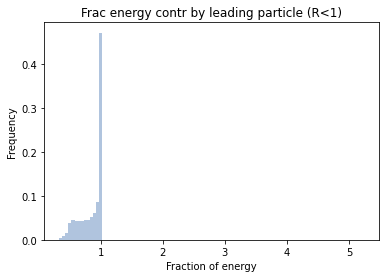

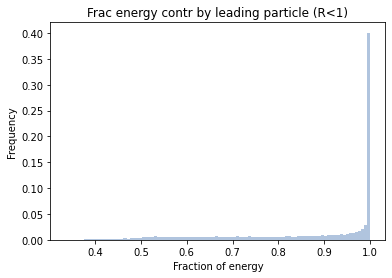

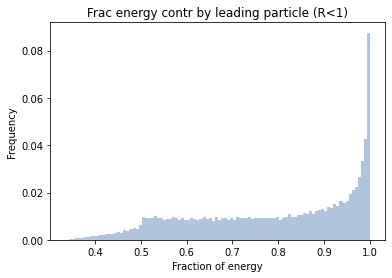

frac time lead particle contributed < 40.0%: 0.005509786430183135
frac time lead particle contributed < 50.0%: 0.037274142484826224
frac time lead particle contributed < 60.0%: 0.128404260901506
frac time lead particle contributed < 70.0%: 0.21577373143726714
frac time lead particle contributed < 80.0%: 0.30718371202182926


In [ ]:
# num truth contr [num events, max 3 part x num cells x num clus]
# lead contr frac [num events, max 3 part x num cells x num clus]

delta_R_cut = 1


flat_lead_contr_frac = ak.Array(flatten_layers(lead_contribution_frac[delta_R < delta_R_cut], 1))
flat_num_truth_contr = ak.Array(flatten_layers(num_truth_contributions[delta_R < delta_R_cut], 1))

pu.plot_hist(np.array(flat_lead_contr_frac[flat_num_truth_contr != 0]), 100, "Frac energy contr by leading particle (R<" + str(delta_R_cut) +")", "Fraction of energy", "Frequency", colour="lightsteelblue")
pu.plot_hist(np.array(flat_lead_contr_frac[(flat_lead_contr_frac > 0) & (flat_lead_contr_frac <= 1)]), 100, "Frac energy contr by leading particle (R<" + str(delta_R_cut) +")", "Fraction of energy", "Frequency", colour="lightsteelblue")
pu.plot_hist(np.array(flat_lead_contr_frac[(flat_lead_contr_frac > 0) & (flat_lead_contr_frac < 1)]), 100, "Frac energy contr by leading particle (R<" + str(delta_R_cut) +")", "Fraction of energy", "Frequency", colour="lightsteelblue")

contr_frac = 0.4
print("frac time lead particle contributed < " + str(contr_frac*100) + "%:", np.count_nonzero(np.array(flat_lead_contr_frac[(flat_lead_contr_frac > 0) & (flat_lead_contr_frac <= 1)] < contr_frac))/len(np.array(flat_lead_contr_frac[(flat_lead_contr_frac > 0) & (flat_lead_contr_frac <= 1)])))

contr_frac = 0.5
print("frac time lead particle contributed < " + str(contr_frac*100) + "%:", np.count_nonzero(np.array(flat_lead_contr_frac[(flat_lead_contr_frac > 0) & (flat_lead_contr_frac <= 1)] < contr_frac))/len(np.array(flat_lead_contr_frac[(flat_lead_contr_frac > 0) & (flat_lead_contr_frac <= 1)])))

contr_frac = 0.6
print("frac time lead particle contributed < " + str(contr_frac*100) + "%:", np.count_nonzero(np.array(flat_lead_contr_frac[(flat_lead_contr_frac > 0) & (flat_lead_contr_frac <= 1)] < contr_frac))/len(np.array(flat_lead_contr_frac[(flat_lead_contr_frac > 0) & (flat_lead_contr_frac <= 1)])))

contr_frac = 0.7
print("frac time lead particle contributed < " + str(contr_frac*100) + "%:", np.count_nonzero(np.array(flat_lead_contr_frac[(flat_lead_contr_frac > 0) & (flat_lead_contr_frac <= 1)] < contr_frac))/len(np.array(flat_lead_contr_frac[(flat_lead_contr_frac > 0) & (flat_lead_contr_frac <= 1)])))

contr_frac = 0.8
print("frac time lead particle contributed < " + str(contr_frac*100) + "%:", np.count_nonzero(np.array(flat_lead_contr_frac[(flat_lead_contr_frac > 0) & (flat_lead_contr_frac <= 1)] < contr_frac))/len(np.array(flat_lead_contr_frac[(flat_lead_contr_frac > 0) & (flat_lead_contr_frac <= 1)])))